In [130]:
# Import libraries
import pandas as pd
import numpy as np
import os
from scipy import stats

In [131]:
# Read the five datasets (CSV files)
encounters = pd.read_csv("..../encounters.csv")
claims = pd.read_csv("..../claims.csv")
organizations = pd.read_csv("..../organizations.csv")
patients = pd.read_csv("..../patients.csv")
providers = pd.read_csv("..../providers.csv")

___
### Part 1 - Individual Provider
- There have been rumours that a specific provider with the ID "bb49afa2-3d8a-306c-a06e-a1715dd71af8" is overbilling treatments for patients, resulting in allegedly excessive claim costs. In particular, the provider has been accused of having an average total claim cost that is significantly higher than other providers of the same specialty i.e., General Practice.
- Our task is to identify the provider based on his/her details, and verify whether this accusation is true.

#### Find the details (e.g., name, organization, gender etc.) of the provider.

In [132]:
gp_provider = providers[providers['ID'] == "bb49afa2-3d8a-306c-a06e-a1715dd71af8"]
gp_provider

,ID,ORGANIZATION,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE
46,bb49afa2-3d8a-306c-a06e-a1715dd71af8,226098a2-6a40-3588-b5bb-db56c3a30a04,Hal307 Renner328,M,GENERAL PRACTICE,235 NORTH PEARL STREET,BROCKTON,MA


In [133]:
# insert your code here:

gp_provider = providers[providers['SPECIALITY'] == 'GENERAL PRACTICE']['ID'].unique()
gp_encounters = encounters[encounters['PROVIDER'].isin(gp_provider)]

avg_claim_gp = gp_encounters[gp_encounters['PROVIDER'] == "bb49afa2-3d8a-306c-a06e-a1715dd71af8"]['TOTAL_CLAIM_COST'].mean()
avg_claim_op = gp_encounters[gp_encounters['PROVIDER'] != "bb49afa2-3d8a-306c-a06e-a1715dd71af8"]['TOTAL_CLAIM_COST'].mean()

print(f"Average claim for general practice ${avg_claim_gp}")
print(f"Average claim for other providers ${avg_claim_op}")

Average claim for general practice $16281.1475
Average claim for other providers $2722.7999781746034


#### State the null hypothesis and alternative hypothesis.

- **Null hypothesis H<sub>0</sub>**: There is no significant difference in the average total claim costs between general practice providers and other providers.
- **Alternative hypothesis H<sub>a</sub>**: There is a significant difference between general practice total claim costs and other providers. There could be several factors such as nature of treatments provided or patient demographics. 

#### Retrieve the providers information involved in each encounter. 

In [134]:
# insert your code here:

df = pd.merge(encounters, providers, left_on='PROVIDER', right_on='ID', suffixes=(' ', '_y'))
df = df.loc[:, ~df.columns.str.endswith('_y')]
df.columns = df.columns.str.rstrip('_x')
df.head()

,ID,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,NAME,GENDER,SPECIALITY,ADDRESS,CITY,STATE
0,c8eaaf41-958b-31ab-7de5-568cee8751f3,27/11/2016 17:20,27/11/2016 17:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185345009,Encounter for symptom,77.49,77.49,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
1,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,22/2/2017 8:52,22/2/2017 9:52,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,emergency,C50849002,Emergency room admission (procedure),129.16,1162.46,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
2,7eab9841-6b96-3c2f-d7f8-fc14a8810e68,2/6/2017 9:25,2/6/2017 9:40,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185349003,Encounter for 'check-up',77.49,77.49,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
3,68e737e5-a4a1-0ffd-7234-8fb04a2b0c19,23/6/2021 8:20,23/6/2021 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,outpatient,C698314001,Consultation for treatment,129.16,4086.94,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA
4,78fdedd9-24e2-2711-15e9-e43a73ade634,4/10/2021 8:20,4/10/2021 8:39,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,outpatient,C308335008,Patient encounter procedure,129.16,3234.70,Wilton999 Pollich983,M,GENERAL PRACTICE,14 PROSPECT STREET,MILFORD,MA


#### Find the average total claim cost for the GENERAL PRACTICE speciality (and assign the value to a variable)

In [135]:
# insert your code here:

avg_total_claim_gp = df[df['SPECIALITY'] == 'GENERAL PRACTICE']['TOTAL_CLAIM_COST'].mean()
avg_total_claim_gp

2882.3099490196078

#### Perform one-sample t-test by using the corresponding scipy function to execute the test. 

In [182]:
# insert your code here:

provider_id = "bb49afa2-3d8a-306c-a06e-a1715dd71af8"
provider_info = providers.loc[providers['ID'] == provider_id]
gp_providers_ids = providers[providers['SPECIALITY'] == 'GENERAL PRACTICE']['ID']

other_gp_providers_claims = encounters[encounters['PROVIDER'].isin(gp_providers_ids) & (encounters['PROVIDER'] != provider_id_for_test)]['TOTAL_CLAIM_COST']

average_claim_cost_for_others = other_gp_providers_claims.mean()

specific_provider_claims.describe(), average_claim_cost_for_others

from scipy.stats import ttest_1samp

t_stat, p_value = ttest_1samp(specific_provider_claims, popmean=average_claim_cost_for_others, alternative='greater')

t_stat, p_value

(1.302679144051089, 0.09887308034559181)

#### Based on the output above, provide your conclusion (in free text) for this hypothesis testing (at 95% confidence level)

##### Enter your conclusion(s) here:


Based on the p-value of 0.099, which is greater than the common significance level of 0.05, we do not have sufficient evidence to conclude that the specific provider's mean total claim cost is significantly greater than the average total claim cost of other GP providers. This suggests that while the specific provider's mean claim cost is higher, we can't statistically confirm it's a significant difference from the average of other GPs at the 5% significance level.

___
### Part 2 - Two organizations
- There are two organizations with similar profiles (types of patients seen, location etc.) for which we want to test whether the total claim costs between them are indeed similar as well. 
- The IDs of the two organizations are "226098a2-6a40-3588-b5bb-db56c3a30a04" and "108ccece-277a-396f-8bf2-1527f74458eb"

In [157]:
org1_id = "226098a2-6a40-3588-b5bb-db56c3a30a04"
org2_id = "108ccece-277a-396f-8bf2-1527f74458eb"

In [158]:
org1_claim_costs = encounters[encounters['ORGANIZATION'] == org1_id]['TOTAL_CLAIM_COST']
org2_claim_costs = encounters[encounters['ORGANIZATION'] == org2_id]['TOTAL_CLAIM_COST']

org1_avg_costs = encounters[encounters['ORGANIZATION'] == org1_id]['TOTAL_CLAIM_COST'].mean()
org2_avg_costs = encounters[encounters['ORGANIZATION'] == org2_id]['TOTAL_CLAIM_COST'].mean()

#### State the null hypothesis and alternative hypothesis (Provide answers in free text).

- **Null hypothesis H<sub>0</sub>**: The mean of total claim costs for organization 1 and organization 2 are similar.
- **Alternative hypothesis H<sub>a</sub>**: There are difference between total claim costs for organization 1 and organization 2. This is a 2-tailed test

#### Display the details (name, address etc.) of the two organizations as a single output DataFrame

In [159]:
# insert your code here:

org_ids = [org1_id, org2_id]
org_details_df = organizations[organizations['ID'].isin(org_ids)]

org_details_df

,ID,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON,PHONE
46,226098a2-6a40-3588-b5bb-db56c3a30a04,GOOD SAMARITAN MEDICAL CENTER,235 NORTH PEARL STREET,BROCKTON,MA,629-615,42.082543,-71.024638,1-506-63660
1119,108ccece-277a-396f-8bf2-1527f74458eb,ON CALL URGENT CARE CENTER,51 LOCUST STREET,NORTHAMPTON,MA,488-523,42.332315,-72.654565,1-777-37085


#### What is the name of the CITY that these two organizations are based in?

##### Brockton and Northampton


#### Store the total claim costs for each organization

In [160]:
# insert your code here:

org1_sum_costs = encounters[encounters['ORGANIZATION'] == org1_id]['TOTAL_CLAIM_COST'].sum()
org2_sum_costs = encounters[encounters['ORGANIZATION'] == org2_id]['TOTAL_CLAIM_COST'].sum()

print(f' Total claim costs for organization 1 is ${org1_sum_costs}')
print(f' Total claim costs for organization 2 is ${org2_sum_costs}')

 Total claim costs for organization 1 is $976868.85
 Total claim costs for organization 2 is $516.64


#### Perform a two-sample independent t-test (using the appropriate scipy function)
- Assume equal variance by default

In [185]:
# insert your code here:

org1_id = "226098a2-6a40-3588-b5bb-db56c3a30a04"
org2_id = "108ccece-277a-396f-8bf2-1527f74458eb"

org1_data = encounters[encounters['ORGANIZATION'] == org1_id]['TOTAL_CLAIM_COST']
org2_data = encounters[encounters['ORGANIZATION'] == org2_id]['TOTAL_CLAIM_COST']

# Check the size of the datasets for both organizations
org1_size = org1_data.size
org2_size = org2_data.size

from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(org1_data, org2_data, equal_var=True)

t_stat, p_value

/var/folders/y3/l5b_b_2d2l78psh3w5zzg99m0000gn/T/ipykernel_4401/2276833391.py:16: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(org1_data, org2_data, equal_var=True)


(0.39771000475581114, 0.6922100176419317)

#### (2.6) Based on the output above, provide your conclusion (in free text) for this hypothesis testing (at 95% confidence level)

The two-sample independent t-test resulted in a t-statistic of approximately 0.398 and a p-value of approximately 0.692.
The p-value indicates the probability of observing the test results under the null hypothesis, which in this context is that there is no difference in the mean total claim costs between the two organizations. A p-value of 0.692 is much higher than the common alpha level of 0.05, suggesting that we do not have enough evidence to reject the null hypothesis. Therefore, based on this analysis, it appears that there is no statistically significant difference in the mean total claim costs between the two organizations.

- At a 95% confidence level, the p-value is higher than the significance level of 0.05
- Therefore, we do not reject the null hypothesis, and conclude that the average total claim costs between the two organizations are similar

___
### Part 3 - More than two organizations

- The insurer is now keen to review the average total claim costs of PCPs (private clinical practices) within a particular set of cities, and to see if one or more of them has a significantly different (higher or lower) average dollar cost from the rest
- The set of cities include **AVON** and **WATERTOWN**.

#### Retrieve the organization information involved in each encounter.

In [143]:
merge_data = pd.merge(encounters,
                      organizations[['ID', 'NAME', 'CITY']],
                      left_on='ORGANIZATION',
                      right_on='ID',
                      how='left').drop(columns=['ID_y']).rename(columns={'ID_x': 'ID', 'NAME': 'ORGANIZATION_NAME', 'CITY': 'ORGANIZATION_CITY'})

merge_data

,ID,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,ORGANIZATION_NAME,ORGANIZATION_CITY
0,c8eaaf41-958b-31ab-7de5-568cee8751f3,27/11/2016 17:20,27/11/2016 17:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185345009,Encounter for symptom,77.49,77.49,MILFORD REGIONAL MEDICAL CENTER,MILFORD
1,6474f606-5a1b-48c0-bbbf-ad6dcbc24d4e,22/2/2017 8:52,22/2/2017 9:52,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,emergency,C50849002,Emergency room admission (procedure),129.16,1162.46,MILFORD REGIONAL MEDICAL CENTER,MILFORD
2,7eab9841-6b96-3c2f-d7f8-fc14a8810e68,2/6/2017 9:25,2/6/2017 9:40,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,ambulatory,C185349003,Encounter for 'check-up',77.49,77.49,MILFORD REGIONAL MEDICAL CENTER,MILFORD
3,676b26cf-85c1-60d8-b4b2-ed9b34d5b3a7,24/7/2017 8:20,24/7/2017 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,620d4a8a-ef3b-30c4-9c58-a409e8f3b7f1,6240e34b-f1a6-374d-af15-dea26341ba2e,wellness,C410620009,Well child visit (procedure),129.16,926.85,POSTUM EYE CARE INC,BELLINGHAM
4,68e737e5-a4a1-0ffd-7234-8fb04a2b0c19,23/6/2021 8:20,23/6/2021 8:35,c1f1fcaa-82fd-d5b7-3544-c8f9708b06a8,24cb4eab-6166-3530-bddc-a5a8a14a4fc1,e2d3a787-83d4-3bd9-a769-753b3285078d,outpatient,C698314001,Consultation for treatment,129.16,4086.94,MILFORD REGIONAL MEDICAL CENTER,MILFORD
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095,f60aa3dc-a861-a3c7-6f4d-2bd58f7d973d,21/12/2011 5:11,21/12/2011 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory,C390906007,Follow-up encounter,77.49,77.49,NORTH SHORE MEDICAL CENTER -,SALEM
5096,88288c66-1201-390a-a309-d70caf3366e0,19/12/2017 5:11,19/12/2017 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory,C390906007,Follow-up encounter,77.49,77.49,NORTH SHORE MEDICAL CENTER -,SALEM
5097,54d4b63d-e397-ce54-7fd8-5b95848df927,29/12/2017 5:11,29/12/2017 5:26,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,cd300275-3f4d-3adb-98aa-4e5bba25be24,7cd691a9-0e34-351a-918d-af3f6d3c0279,wellness,C162673000,General examination of patient (procedure),129.16,1295.48,PCP191696,SWAMPSCOTT
5098,b171a750-d9a0-f87c-f463-ca8a11ce99e8,21/6/2018 5:51,21/6/2018 6:51,cb1b2c74-d1c5-997c-6f8b-20ca9f332eef,4861d01f-019c-3dac-a153-8334e50919f9,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,emergency,C50849002,Emergency room admission (procedure),129.16,129.16,NORTH SHORE MEDICAL CENTER -,SALEM


#### From the output DataFrame above, filter the data based on the following criteria:
- Name of organization has 'PCP' in it
- Cities of AVON and WATERTOWN

In [144]:
filtered_data = merge_data[(merge_data['ORGANIZATION_NAME'].str.contains("PCP")) & (merge_data['ORGANIZATION_CITY'].isin(["AVON", "WATERTOWN"]))]
filtered_data

,ID,START,STOP,PATIENT,ORGANIZATION,PROVIDER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,ORGANIZATION_NAME,ORGANIZATION_CITY
2271,493181de-88fa-1055-7c0f-5cce6ffdd08d,18/4/2005 18:21,18/4/2005 18:36,b74d0752-3c8d-4374-78d0-618105abb04c,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,926.85,PCP166078,AVON
2272,4dfac54e-6737-c931-96bf-d6f058fda32e,21/4/2008 18:21,21/4/2008 18:36,b74d0752-3c8d-4374-78d0-618105abb04c,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,1457.36,PCP166078,AVON
2273,e0e0275f-c474-b9c9-2d02-d3f0a04adac4,25/4/2011 18:21,25/4/2011 18:36,b74d0752-3c8d-4374-78d0-618105abb04c,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,786.33,PCP166078,AVON
2274,f0e3b672-1c16-e5a0-b6d5-6a169d64afcc,15/2/2016 18:21,15/2/2016 18:36,b74d0752-3c8d-4374-78d0-618105abb04c,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,1067.37,PCP166078,AVON
2801,b6045c76-788d-9059-7195-96bc8daeadda,20/4/1995 11:20,20/4/1995 11:35,1a5224e4-383b-6e73-79a7-98a499069b10,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,786.33,PCP166078,AVON
2802,253e8ab2-49b2-be54-eef7-4af96aa17800,11/2/2010 11:20,11/2/2010 11:35,1a5224e4-383b-6e73-79a7-98a499069b10,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,786.33,PCP166078,AVON
2803,c27c19ce-ad56-9924-cbda-7e5b1e5d8420,12/3/2015 11:20,12/3/2015 11:35,1a5224e4-383b-6e73-79a7-98a499069b10,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,1199.83,PCP166078,AVON
2804,862ad725-60c9-e53d-138f-b5f52752dd4f,9/4/2020 11:20,9/4/2020 11:35,1a5224e4-383b-6e73-79a7-98a499069b10,f3b73817-43cb-3762-8353-bcfb64aa9b10,5f392c8f-dbfb-3e4b-aa07-d441326f6659,wellness,C162673000,General examination of patient (procedure),129.16,786.33,PCP166078,AVON
3980,a92ebbb6-f29e-2a9e-7916-c6658fe35dfd,14/1/2012 0:21,14/1/2012 0:36,95dd641e-8d91-91c7-9986-ab400aba1fa5,71b6fd75-d5ca-3f0a-a81e-1fc098c63ba2,1607b16d-c358-37c0-8f50-f23b7868df36,wellness,C410620009,Well child visit (procedure),129.16,985.82,PCP1090,WATERTOWN
3982,fe2334f8-d7ee-9c3a-19a0-9728693a11d7,14/7/2012 0:21,14/7/2012 0:36,95dd641e-8d91-91c7-9986-ab400aba1fa5,71b6fd75-d5ca-3f0a-a81e-1fc098c63ba2,1607b16d-c358-37c0-8f50-f23b7868df36,wellness,C410620009,Well child visit (procedure),129.16,269.68,PCP1090,WATERTOWN


#### From the output above, how many PCPs are we investigating, and what are the names of these PCPs

In [145]:
# insert your code here:

pcp_count = filtered_data['ORGANIZATION_NAME'].nunique()
pcp_names = filtered_data['ORGANIZATION_NAME'].unique()

pcp_count, pcp_names

(4, array(['PCP166078', 'PCP1090', 'PCP26110', 'PCP148963'], dtype=object))

There are 4 PCP organizations to be reviewed in Avon and Watertown

#### State the null hypothesis and alternative hypothesis.

- **Null hypothesis H<sub>0</sub>**: There are no difference on the average total claim costs between cities of AVON, WATERTOWN
- **Alternative hypothesis H<sub>a</sub>**: There are signficiant difference on the average total claim costs for at least one city compared to others

#### Store the total claim costs for each organization

In [146]:
# insert your code here:

total_claim_cost_org = {name: group['TOTAL_CLAIM_COST'] for name, group in filtered_data.groupby('ORGANIZATION_NAME')}
list(total_claim_cost_org.keys())

['PCP1090', 'PCP148963', 'PCP166078', 'PCP26110']

#### Based on the context, claim cost variables and following assumptions, select and perform the appropriate test (using scipy) to evaluate the hypothesis

Assumptions to be made:
- Samples are independent.
- Each sample is from a normally distributed population.
- Population standard deviations of the groups are all equal (i.e., homoscedasticity)

In [187]:
# insert your code here:

from scipy import stats
claim_cost_variables = list(total_claim_cost_org.values())
result = stats.f_oneway(*claim_cost_variables)
result

F_onewayResult(statistic=6.540424475856282, pvalue=0.001919570905946774)

#### (3.7) Based on the output above, provide your conclusion (in free text) for this hypothesis testing (at 95% confidence level)

##### Enter your conclusion(s) here: The ANOVA test results yield an F-Statistic of approximately 6.54 and a P-Value of approximately 0.0019. Given that the P-Value is less than the commonly used alpha level of 0.05, we can reject the null hypothesis. This suggests that there is a statistically significant difference in the average total claim costs among the identified Private Clinical Practices (PCPs) in AVON and WATERTOWN.


___
### Part 4 - Proportions across two providers
- To account for differences in total claim costs across two doctors (i.e., providers), the insurer is looking to test if there is any significant differences in the proportion of encounter classes (e.g., outpatient, inpatient etc.) that they each have to handle.
- The providers to be evaluated are as follows:
  - ID of Provider 1: **b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd** 
  - ID of Provider 2: **fc897c25-b2ee-30c5-a945-d0eb13a1f96e**

#### (4.1) Filter data to the two providers (as a single output DataFrame)
- From the encounters dataset, filter the rows to records belonging to the two providers with the IDs above
- Next, keep only the following columns: `ID`, `PROVIDER`, and `ENCOUNTERCLASS`

In [148]:
# insert your code here:

provider_1_id = 'b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd'
provider_2_id = 'fc897c25-b2ee-30c5-a945-d0eb13a1f96e'
provider_1 = encounters[encounters['PROVIDER'] == provider_1_id]
provider_2 = encounters[encounters['PROVIDER'] == provider_2_id]
filtered = encounters[encounters['PROVIDER'].isin([provider_1_id, provider_2_id])]
filtered_data = filtered[['ID', 'PROVIDER', 'ENCOUNTERCLASS']]
filtered_data

,ID,PROVIDER,ENCOUNTERCLASS
143,3c959159-5f9b-874f-0460-12e13c20542b,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory
145,8e289211-4058-1737-6af3-36205367759f,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,outpatient
146,7fdd5365-3db8-eccc-4ef8-42157c0780cc,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,outpatient
147,d11f84cb-d531-6697-d487-3b6e6d639dd4,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,emergency
148,d0098a4c-e302-2f9b-f181-f5e36a314971,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory
...,...,...,...
5089,d9d886d2-1131-8d33-6033-a387b18f7456,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,outpatient
5095,f60aa3dc-a861-a3c7-6f4d-2bd58f7d973d,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory
5096,88288c66-1201-390a-a309-d70caf3366e0,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,ambulatory
5098,b171a750-d9a0-f87c-f463-ca8a11ce99e8,b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,emergency


#### (4.2) Generate cross tabulation table (with totals)
- Aim is to create a DataFrame (named `df_crosstab`) of the counts of the various encounter classes for each provider  
- You should generate a output DataFrame that looks something like the following:

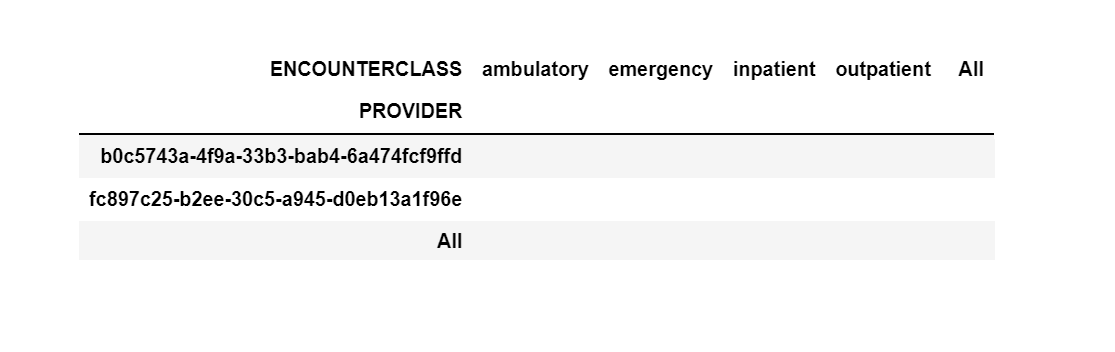

In [149]:
# insert your code here:

df_crosstab = pd.crosstab(filtered_data['PROVIDER'], filtered_data['ENCOUNTERCLASS'], margins=True)
df_crosstab

ENCOUNTERCLASS,ambulatory,emergency,inpatient,outpatient,All
PROVIDER,,,,,
b0c5743a-4f9a-33b3-bab4-6a474fcf9ffd,70,5,0,35,110
fc897c25-b2ee-30c5-a945-d0eb13a1f96e,60,7,3,35,105
All,130,12,3,70,215


- Rename the index and columns using the following sample codes:
  - `df_crosstab.index = ['provider_1', 'provider_2', 'col_total']`
  - `df_crosstab.columns = ['ambulatory', 'emergency', 'inpatient', 'outpatient', 'row_total']`

In [150]:
# insert your code here:

df_crosstab.index = ['provider_1', 'provider_2', 'col_total']
df_crosstab.columns = ['ambulatory', 'emergency', 'inpatient', 'outpatient', 'row_total']
df_crosstab

,ambulatory,emergency,inpatient,outpatient,row_total
provider_1,70,5,0,35,110
provider_2,60,7,3,35,105
col_total,130,12,3,70,215


- Create a contingency table without the row total and column total

In [151]:
# insert your code here:

contingency_table = df_crosstab.iloc[:-1, :-1]
contingency_table

,ambulatory,emergency,inpatient,outpatient
provider_1,70,5,0,35
provider_2,60,7,3,35


#### State the alternative hypothesis.

- **Null hypothesis H<sub>0</sub>**: There is no difference in the count frequencies of encounter classes seen by the two providers
- **Alternative hypothesis H<sub>a</sub>**: There is a difference in the count frequencies of encounter classes by the two providers

#### Perform the chi-square test of independence
- Use the `stats.chi2_contingency` function e.g., `chi2_contingency(df_observed`)
- There will be 4 outputs from the function (in sequence):
  - chi2: Chi-squared test statistic
  - p: p-value of the test
  - dof: degrees of freedom
  - expected: Expected frequencies based on the marginal sums of the contingency table
- Since there are 4 outputs, make sure that there are 4 variables provided to capture and store the output values e.g., `a,b,c,d = func(df)`

In [152]:
# insert your code here:

from scipy.stats import chi2_contingency
result = chi2_contingency(contingency_table)
result

Chi2ContingencyResult(statistic=3.9884421134421144, pvalue=0.26271488055913067, dof=3, expected_freq=array([[66.51162791,  6.13953488,  1.53488372, 35.81395349],
       [63.48837209,  5.86046512,  1.46511628, 34.18604651]]))

#### From the function output above, what is the p-value of the chi-square test of independence?

pvalue = 0.263

#### Based on the output above, provide your conclusion (in free text) for this hypothesis testing (at 95% confidence level)

##### Enter your conclusion(s) here: Based on the pvalue of 0.263, we failed to reject the null hypothesis at the 95% confidence level. We cannot conclude there is a significant difference in the fequencies of encounter classes between the two providers.
